### Data Mining 
**Universidad Politécnica de Yucatán**

**Author:** Walter Vives


**Github:** [WalterVives](https://github.com/WalterVives)

In [1]:
!pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

  Using cached https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp36-cp36m-linux_x86_64.whl size=1273366 sha256=44e2aedee867b00aa18474594035acd60af1819a86399579df4bc12319446a2b
  Stored in directory: /tmp/pip-ephem-wheel-cache-b0m3o3s3/wheels/d3/a5/a8/411bc2d0939f2cc9d17f34f0d3457043c68e14a98b91fd8301
Successfully built scikit-learn-extra


In [2]:
import pandas as pd
import numpy as np
# pretty print
import pprint
# Visualization libraries.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import missingno as mnso
from mpl_toolkits.mplot3d import Axes3D
# Dataset.
from sklearn.datasets import load_iris
# Machine learning libraries.
from sklearn.cluster import k_means
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
# Rendering LaTex
from IPython.display import Math, HTML
display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/"
               "latest.js?config=default'></script>"))

In [3]:
# Load the data.
iris = load_iris()
pprint.pprint(iris)

{'DESCR': '.. _iris_dataset:\n'
          '\n'
          'Iris plants dataset\n'
          '--------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          '    :Number of Instances: 150 (50 in each of three classes)\n'
          '    :Number of Attributes: 4 numeric, predictive attributes and the '
          'class\n'
          '    :Attribute Information:\n'
          '        - sepal length in cm\n'
          '        - sepal width in cm\n'
          '        - petal length in cm\n'
          '        - petal width in cm\n'
          '        - class:\n'
          '                - Iris-Setosa\n'
          '                - Iris-Versicolour\n'
          '                - Iris-Virginica\n'
          '                \n'
          '    :Summary Statistics:\n'
          '\n'
          '    ============== ==== ==== ======= ===== ====================\n'
          '                    Min  Max   Mean    SD   Class Correlation\n'
          '  

### Properties of the iris dataset

In [4]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

### Description of the dataset.

In [5]:
pprint.pprint(iris.DESCR)

('.. _iris_dataset:\n'
 '\n'
 'Iris plants dataset\n'
 '--------------------\n'
 '\n'
 '**Data Set Characteristics:**\n'
 '\n'
 '    :Number of Instances: 150 (50 in each of three classes)\n'
 '    :Number of Attributes: 4 numeric, predictive attributes and the class\n'
 '    :Attribute Information:\n'
 '        - sepal length in cm\n'
 '        - sepal width in cm\n'
 '        - petal length in cm\n'
 '        - petal width in cm\n'
 '        - class:\n'
 '                - Iris-Setosa\n'
 '                - Iris-Versicolour\n'
 '                - Iris-Virginica\n'
 '                \n'
 '    :Summary Statistics:\n'
 '\n'
 '    ============== ==== ==== ======= ===== ====================\n'
 '                    Min  Max   Mean    SD   Class Correlation\n'
 '    ============== ==== ==== ======= ===== ====================\n'
 '    sepal length:   4.3  7.9   5.84   0.83    0.7826\n'
 '    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n'
 '    petal length:   1.0  6.9   3.76   1.76    

### Creating dataframe

In [6]:
df = pd.DataFrame(iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


The columns correspond to:
- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm
 

### Saving the correspond target into the dataframe




In [7]:
# The meaning of the target
for i in enumerate(iris.target_names.tolist()):
  print(i)

(0, 'setosa')
(1, 'versicolor')
(2, 'virginica')


In [8]:
df["Target"] = iris.target
df.sample(10) # a sample of the dataset.

,0,1,2,3,Target
54,6.5,2.8,4.6,1.5,1
78,6.0,2.9,4.5,1.5,1
71,6.1,2.8,4.0,1.3,1
130,7.4,2.8,6.1,1.9,2
125,7.2,3.2,6.0,1.8,2
3,4.6,3.1,1.5,0.2,0
82,5.8,2.7,3.9,1.2,1
107,7.3,2.9,6.3,1.8,2
52,6.9,3.1,4.9,1.5,1
132,6.4,2.8,5.6,2.2,2


### Data of the dataset


In [9]:
X = iris.data
y = iris.target
print("Data:\n", X[:10])

Data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


### Shape of the data

In [10]:
X.shape

(150, 4)

### Target of the dataset

In [11]:
print("target:\n", y)

target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### shape of the target

In [12]:
y.shape

(150,)

### Scalling and fitting Kmedoids

In [13]:
scaler = StandardScaler().fit(X)
x_scaled = scaler.transform(X)
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)

### Silhouette to evaluate cluster

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [15]:
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)
silhouette_avg = silhouette_score(x_scaled, y_kmed)
print(silhouette_avg)

0.4590416105554613


### Selecting the number of clusters with silhouette analysis on KMedoids clustering

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

- Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a
- Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b
Silhouette score, S, for each sample is calculated using the following formula:-

In [16]:
print("silhouette formula: ")
Math(r'S = \frac{(b - a)}{max(a, b)}')

silhouette formula: 


<IPython.core.display.Math object>

The value of the Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary.

A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

**silhouette score concepts**


- Silhouette score for a set of sample data points is used to measure how dense and well-separated the clusters are.
- Silhouette score takes into consideration the intra-cluster distance between the sample and other data points within the same cluster (a) and inter-cluster distance between the sample and the next nearest cluster (b).
- The silhouette score falls within the range [-1, 1].
- The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.
- The silhouette plots can be used to select the most optimal value of the K (no. of cluster) in K-means clustering.
- The aspects to look out for in Silhouette plots are cluster scores below the average silhouette score, wide fluctuations in the size of the clusters, and also the thickness of the silhouette plot.

For n_clusters = 2 The average silhouette_score is : 0.685788171261719
For n_clusters = 3 The average silhouette_score is : 0.5201984013106979
For n_clusters = 4 The average silhouette_score is : 0.49157008299505167
For n_clusters = 5 The average silhouette_score is : 0.43450413867928916
For n_clusters = 6 The average silhouette_score is : 0.3216865483535941


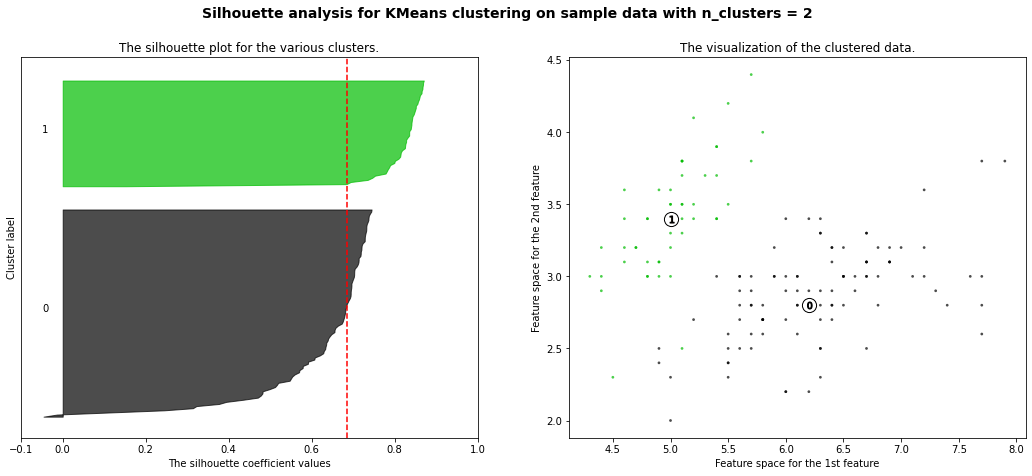

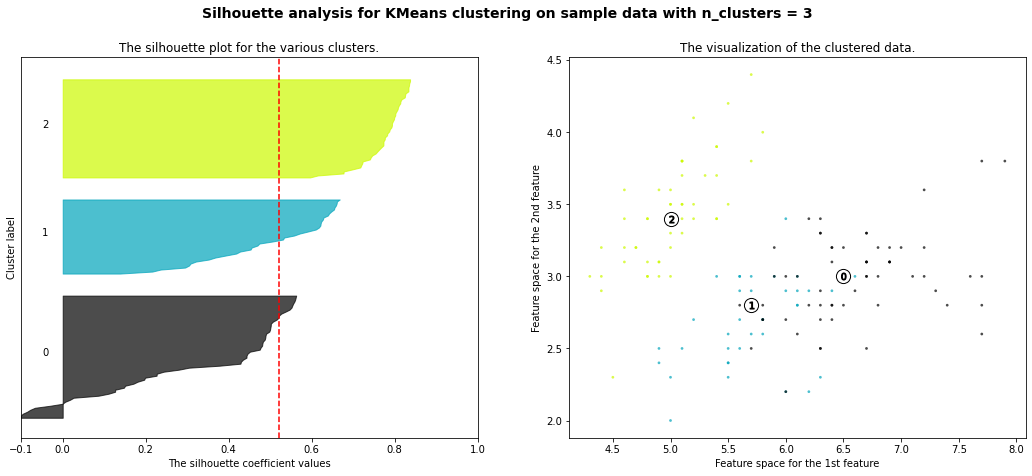

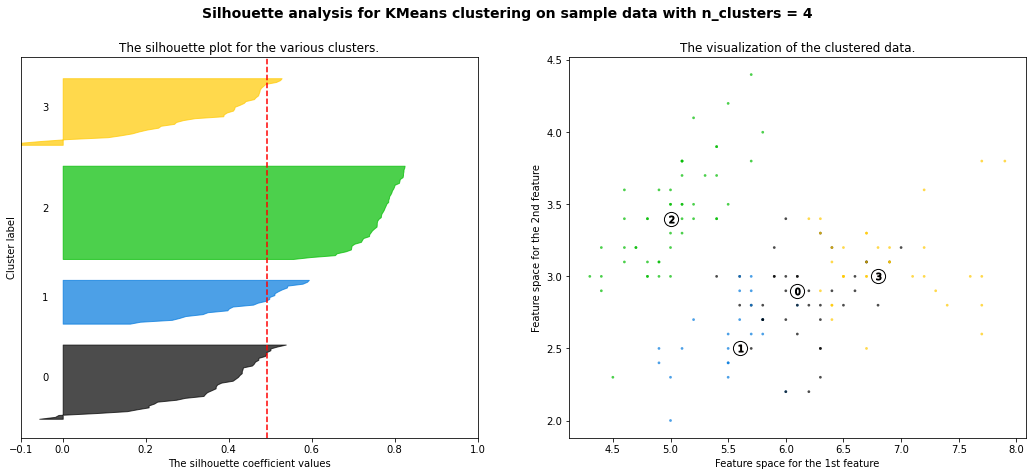

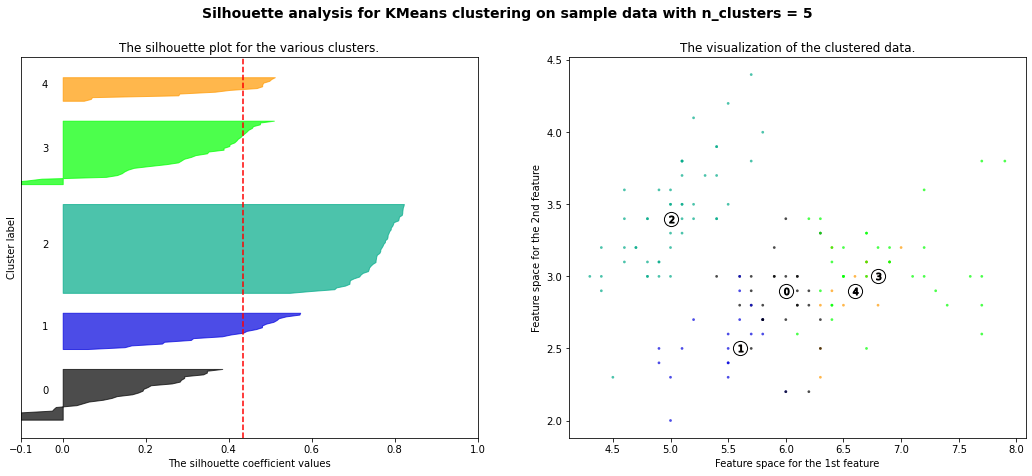

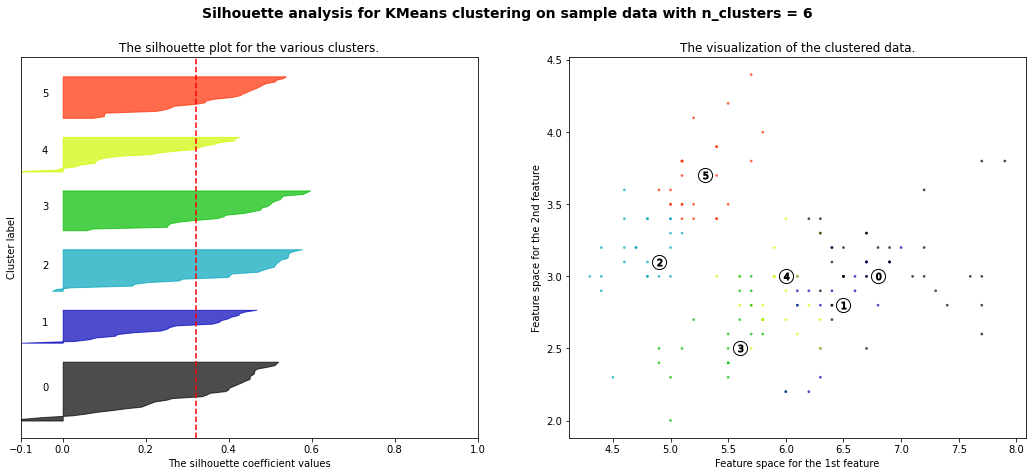

In [17]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMedoids(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

**Analyzing the silhouette diagrams for various values of k**

The vertical dashed lines represent the silhouette score for each number of clusters. When most of the instances in a cluster have a lower coefficient than this score, then the cluster is rather bad since this means its instances are much too close to other clusters.

We can see when k != 3 we get bad clusters, but when k = 3 the clusters look pretty good: most instances extend beyond the dashed line, to the right and closer to 1.0.

For that reason the optimal number of clusters have to be k = 3, that actually it corresponds to the 3 differents classes.

In [19]:
for i in enumerate(iris.target_names.tolist()):
  print(i)

(0, 'setosa')
(1, 'versicolor')
(2, 'virginica')


### The optimal number of clusters have to be k = 3

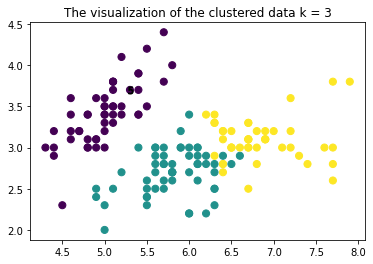

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmed, s=50, cmap='viridis')

centers = kMedoids.cluster_centers_
plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
plt.title("The visualization of the clustered data k = 3")
plt.show()